In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


In [3]:
from hw1.libs.distributions.exp_dist import ExpDist
from hw1.libs.estimators.mle_estimator import MLE
from hw1.libs.estimators.map_estimator import MAP
# from libs.estimators.mse_estimator import MSE

In [4]:
input_variables = {
    # Input for generating exponential distribution
    "size": 20, # total number of data
    "lam": 0.2, # lambda value
    "st_range": 1, # start of range data
    "loc": 0,
    "alpha": 30,
    "beta": 100
    # "beta": 20,
    # "beta": 20,
}


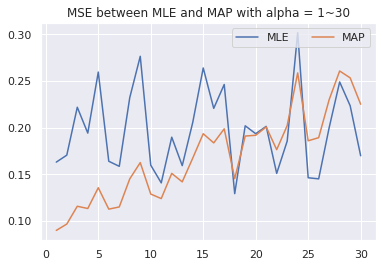

In [5]:

data = ExpDist(**input_variables)
mle_est = MLE(ext_dataset=data, **input_variables)
map_est = MAP(ext_dataset=data, **input_variables)
max_loop = 50
max_alpha = 30
x = np.linspace(1, max_alpha, max_alpha, dtype=int)
# y = np.empty(shape=[max_alpha, 0])
y = []
# print(" ***** y = ", len(y), y)
for alp in range(1, max_alpha+1):
    data.regenerate_dataset(alp)
    
    mle_est.multiple_run(max_loop, data)
    mle_yhat = mle_est.get_array_yhat()
    mean_mle = np.mean(mle_yhat)

    map_est.multiple_run(max_loop, new_alpha=alp, data=data)
    map_yhat = map_est.get_array_yhat()
    mean_map = np.mean(map_yhat)

    y.append([mean_mle, mean_map])

y = np.array(y)
# print(" ***** y = ", len(y), y)

plt.plot(x, y)
plt.title("MSE between MLE and MAP with alpha = 1~30")
labels = ['MLE', 'MAP']
plt.legend(labels, ncol=2, loc='upper right');
